We will conduct a sentiment analysis on the impact of Donald Trump on Twitter having as a criterion for comparison the moment when Elon Musk became the CEO of Twitter
1)In order to be able to do this we will need the following libraries:
Re →  for cleaning the tweets
NLTK →  for removing stop words
Numpy →  for processing image
Pandas →  for handling extracted data
Textblob →  for sentiment analysis
Wordcloud →  for plotting word cloud
Tweepy →  for Twitter API authorization and extracting tweets from it
Matplotlib →  for visualization.

In [25]:
!pip install re 
!pip install nltk
!pip install tweepy
!pip install numpy 
!pip install pandas 
!pip install textblob 
!pip install matplotlib
!pip install wordcloud 
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


^C


2)Import the previous installed libraries

In [ ]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import seaborn as sb


3)Making use of Twitter API

In [ ]:
TWITTER_API_KEY = "8r4bvIuCRsNzrbdPsCqaUoVv9"
TWITTER_API_SECRET = "JptZjnN991736aSssz4F8RUaOPtTHEOejNyDGb064KAjPJ2GMU"
TWITTER_ACCESS_TOKEN = "1297797286148399104-JTeBfDEIMD5xDmuzgtmiOcJMrurhFx"
TWITTER_ACCESS_SECRET = "FmJFEJjFiJEMMRAHenXe1dCNpPD6lz02mKuZVMzBP9b7c"

#Authentificate with Twitter
auth = tweepy.OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_SECRET)
 
#Create the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

4)Get tweets of and about Donald Trump before and after Elon Musk became the CEO of Twitter. The data was saved in a JSON file in case Twitter API crashes or is not available at the moment.

4.1) Before Elon Musk

In [ ]:
#before_query = 'realDonaldTrump -start-time:2021-01-01 -end-time:2022-10-26'  
#resultsBeforeElon = tweepy.Cursor(api.search_tweets, q=before_query, lang='en', tweet_mode='extended').items(2000)
#creating json files containing the mined tweets
#with open("data_before_Elon_Musk_DonaldTrump.json", "w") as f_before:
#    json.dump([tweet.full_text for tweet in resultsBeforeElon], f_before)


In [ ]:
# See how many tweets we actually mined
f_before = open("data_before_Elon_Musk_DonaldTrump.json")
data_before = json.load(f_before)
f_before.close()
len(data_before)

2000

In [ ]:
# add the tweets in a dataframe
df_before = pd.DataFrame(data_before, columns=['Tweets'])  

In [ ]:
# see a sample of the optained tweets before Elon Musk
df_before.shape
(100,1)
pd.set_option("display.max_colwidth", -1) 
df_before.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_14856/1079387593.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
1553,RT @bennyjohnson: BREAKING: @BariWeiss to reveal internal communications of the final decision to ban @realDonaldTrump from Twitter tomorro…
1578,RT @elonmusk: @TomFitton @realDonaldTrump @Twitter Coming soon …
1976,"RT @MandyDelRio: Our documentary, “Shame of a Nation” airs tonight on @NEWSMAX at 10:30pm EST &amp; addresses the civil rights violations of th…"
774,"RT @RSBNetwork: @realDonaldTrump Mr. President, we fought like hell and left nothing on the table. We did our best, we’re sorry it wasn’t e…"
940,"RT @TomFitton: Breaking: @ElonMusk @Twitter Files show Twitter activist employees, without basis, suppressed and censored the President of…"


4.2) After Elon Musk

In [ ]:
#after_query = 'realDonaldTrump -start-time:2022-10-27' 
#resultsAfterElon = tweepy.Cursor(api.search_tweets, q=after_query, lang='en', tweet_mode='extended').items(2000)
# creating json files containing the mined tweets
#with open("data_after_Elon_Musk_DonaldTrump.json", "w") as f_after:
#    json.dump([tweet.full_text for tweet in resultsAfterElon], f_after)

In [ ]:
# See how many tweets we actually mined
f_after = open("data_after_Elon_Musk_DonaldTrump.json")
data_after = json.load(f_after)
f_after.close()
len(data_after)

2000

In [ ]:
# add the tweets in a dataframe
df_after = pd.DataFrame(data_after, columns=['Tweets'])  

In [ ]:
# see a sample of the optained tweets after Elon Musk
df_after.shape
(100,1)
pd.set_option("display.max_colwidth", -1) 
df_after.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_14856/2848080920.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
407,"@JuddLegum God bless our President, @realDonaldTrump ! No other man compares to him, not one! We love you, Mr. President! ❤️🇺🇸❤️🇺🇸❤️🇺🇸❤️"
1865,"RT @alexbruesewitz: The RINOs want us to ignore the election interference that took place in 2020, “move on” from Trump, and anoint Ron DeS…"
285,@JonathanLiles1 @kikimelendez @Scottyb28 @elonmusk @TomFitton @Twitter @realDonaldTrump Sounds like every church in America.
1686,"RT @TomFitton: Breaking: @ElonMusk @Twitter Files show Twitter activist employees, without basis, suppressed and censored the President of…"
114,@elonmusk @TomFitton @realDonaldTrump @Twitter So am I


5)Cleaning the tweets. We will remove from the tweets using regex + re library any URL links, mentions or any elements in a tweet that are irrelevant ot the sentiment analysis.

In [ ]:
def clean_tweets(tweets):
  tweets = re.sub('@[A-Za-z0–9]+', '', tweets) # remove tag(@)
  tweets = re.sub('#[A-Za-z0–9]+', '', tweets) # remove hashtags(#)
  tweets = re.sub('RT[\s]+', '', tweets) # remove RT
  tweets = re.sub('https?:\/\/\S+', '', tweets) # remove URL links
  tweets = re.sub('\[(.*?)\]', '', tweets) #remove fonts and writing styles, e.g. [$lt...$gt]
  return tweets

Applying the previously implemented regex to our tweets lists: before and after Elon Musk

In [ ]:
df_before.Tweets = df_before.Tweets.apply(clean_tweets)
df_after.Tweets = df_after.Tweets.apply(clean_tweets)

# see a sample of the resulted cleaned tweets
pd.set_option("display.max_colwidth", -1) 
df_before.sample(5)
df_after.sample(5)

C:\Users\andre\AppData\Local\Temp/ipykernel_14856/3330001544.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Tweets
1272,103922864 Your logical fallacy is oozing out like lava.
804,I would just like to see some thing done about it. We talk about it all the time but nothing ever happens. Getting sick of it.
1412,Oh please...Trump had Facebook help him during his presidential campaign by harvesting user data and manipulating the masses with it. Look into the Facebook-Cambridge Analytica scandal and how they contributed to his election. Who knows what else he did that we don't know of.
1887,: . thanks for his disclosures and seeks more info from Files.
216,: . thanks for his disclosures and seeks more info from Files.


In [ ]:
# export the cleaned tweets to csv files
df_before.to_csv("clean_data_before_Elon_Musk_Donald_Trump.csv")
df_after.to_csv("clean_data_after_Elon_Musk_Donald_Trump.csv")

6) Calculating the subjectivity and polarity of tweets. The subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective
while polarity means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment.

In [ ]:
# Subjectivity before Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity before Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_before['Subjectivity'] = df_before.Tweets.apply(subj)
df_before['Polarity'] = df_before.Tweets.apply(pol)

df_before.head(5)

,Tweets,Subjectivity,Polarity
0,: Time for Twitter to hire good Journalists across world and publish news an…,0.6,0.7
1,": The 3 TL,DR: The inside story of the removal of . What you don't know about the erosion of st…",0.0,0.0
2,": Breaking: Files show Twitter activist employees, without basis, suppressed and censored the President of…",0.0,0.0
3,: If Twitter making editorial decisions about what it publishes on its priv…,0.0,0.0
4,made Washington look .,0.0,0.0


In [ ]:
# Subjectivity after Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity after Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_after['Subjectivity'] = df_after.Tweets.apply(subj)
df_after['Polarity'] = df_after.Tweets.apply(pol)

df_after.head(5)

,Tweets,Subjectivity,Polarity
0,: . thanks for his disclosures and seeks more info from Files.,0.350000,0.350
1,: . thanks for his disclosures and seeks more info from Files.,0.350000,0.350
2,: . thanks for his disclosures and seeks more info from Files.,0.350000,0.350
3,2003 Morons😂😂😂,0.000000,0.000
4,: Unequivocally true. The evidence is clear and voluminous.,0.516667,0.225


7) Classify the tweets into different sentiment class which are Positive, Negative and Neutral.

7.1) Before Elon Musk

In [ ]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_before['Sentiment'] = df_before.Polarity.apply(sentiment)
df_before.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,: Time for Twitter to hire good Journalists across world and publish news an…,0.6,0.7,Positive
1,": The 3 TL,DR: The inside story of the removal of . What you don't know about the erosion of st…",0.0,0.0,Neutral
2,": Breaking: Files show Twitter activist employees, without basis, suppressed and censored the President of…",0.0,0.0,Neutral
3,: If Twitter making editorial decisions about what it publishes on its priv…,0.0,0.0,Neutral
4,made Washington look .,0.0,0.0,Neutral


7.2) After Elon Musk

In [ ]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_after['Sentiment'] = df_after.Polarity.apply(sentiment)
df_after.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,: . thanks for his disclosures and seeks more info from Files.,0.350000,0.350,Positive
1,: . thanks for his disclosures and seeks more info from Files.,0.350000,0.350,Positive
2,: . thanks for his disclosures and seeks more info from Files.,0.350000,0.350,Positive
3,2003 Morons😂😂😂,0.000000,0.000,Neutral
4,: Unequivocally true. The evidence is clear and voluminous.,0.516667,0.225,Positive


7.3) The ratio of the sentiment in both situations of Donald Trump (Before and After Elon Musk) by using scatter plot, pie plot, bar plot

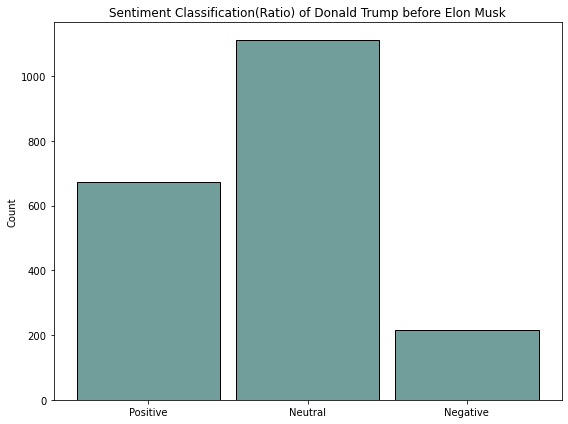

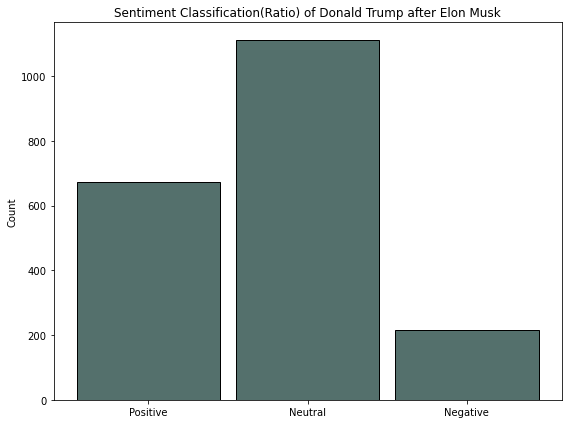

In [ ]:
#The ratio of the sentiment before Elon Musk
plt.figure(figsize = (8,6))
sb.histplot(df_before, x = 'Sentiment', color = '#417D7A', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) of Donald Trump before Elon Musk')
plt.tight_layout()


#The ratio of the sentiment after Elon Musk
plt.figure(figsize = (8,6))
sb.histplot(df_before, x = 'Sentiment', color = '#1B403B', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) of Donald Trump after Elon Musk')
plt.tight_layout()

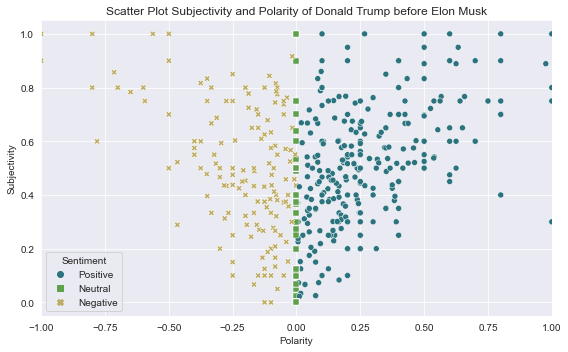

In [ ]:
#Subjectivity vs Polarity in a scatter plot before Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of Donald Trump before Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

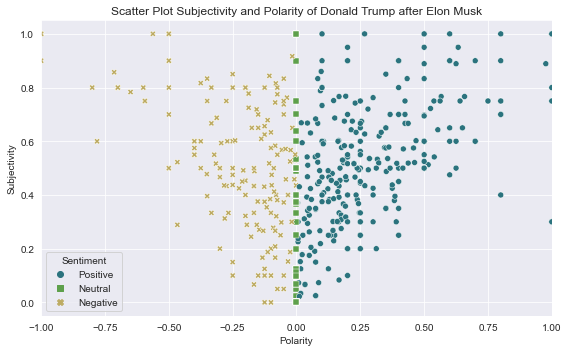

In [ ]:
#Subjectivity vs Polarity in a scatter plot after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of Donald Trump after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

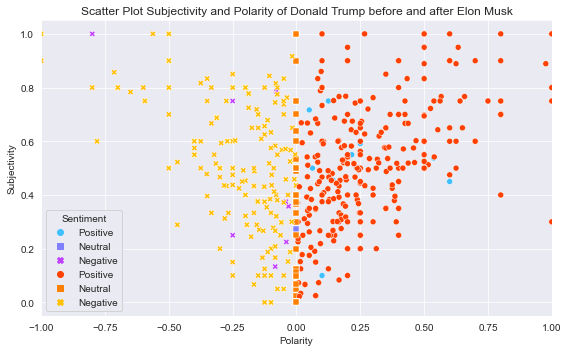

In [ ]:
#Subjectivity vs Polarity in a scatter plot before and after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'cool').set(xlim=(-1,1))
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'autumn').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity of Donald Trump before and after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()



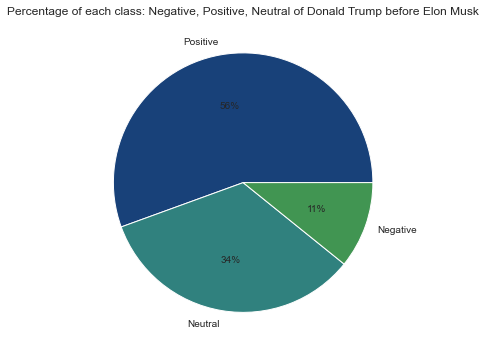

In [ ]:
# The percentage of each class: Negative, Positive, Neutral before Elon Musk
 
df_sentiment_before = pd.DataFrame(df_before.Sentiment.value_counts(normalize=True)*100)
df_sentiment_before['Total Before Elon Musk'] = df_before.Sentiment.value_counts()
df_sentiment_before
plt.figure(figsize = (10, 5))
data = df_before['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral of Donald Trump before Elon Musk')
plt.tight_layout()


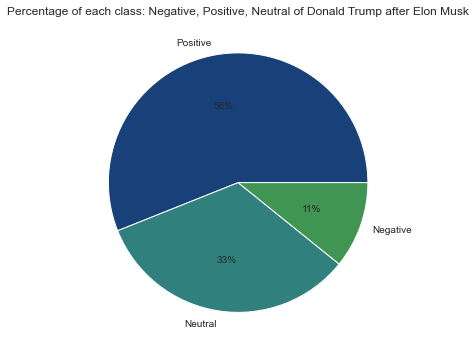

In [ ]:
# The percentage of each class: Negative, Positive, Neutral after Elon Musk

df_sentiment_after = pd.DataFrame(df_after.Sentiment.value_counts(normalize=True)*100)
df_sentiment_after['Total After Elon Musk'] = df_after.Sentiment.value_counts()
df_sentiment_after
plt.figure(figsize = (10, 5))
data = df_after['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral of Donald Trump after Elon Musk')
plt.tight_layout()